# Important Library Imports

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import os
from torch.utils.data import Dataset
import math
from torchvision.utils import make_grid
import time
import pickle

# Load Loss and Validation Accuracy

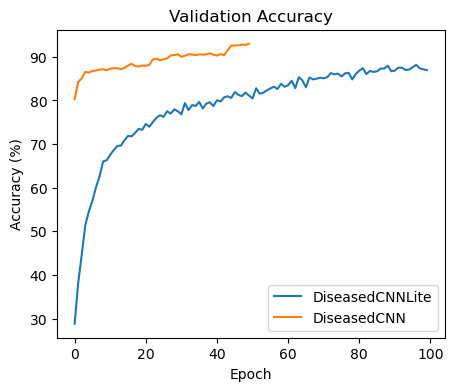

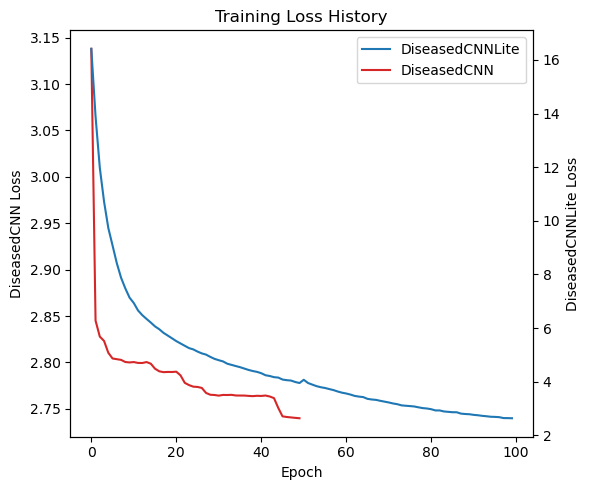

In [ ]:
file_path = "finalmodelinfo/StudentModel/StudentModel_training_info.pickle"
student_loss = []
student_val = []
with open(file_path, "rb") as file:
        loaded = pickle.load(file)
        student_loss = loaded["epoch_loss"]
        student_val = loaded["validation_acc"]

file_path = "finalmodelinfo/DiseasedCNN/DiseasedCNN_training_info.pickle"
teacher_loss = []
teacher_val = []
with open(file_path, "rb") as file:
        loaded = pickle.load(file)
        teacher_loss = loaded["epoch_loss"]
        teacher_val = loaded["validation_acc"]


plt.figure(figsize=(5, 4))
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.plot(student_val, label="DiseasedCNNLite")
plt.plot(teacher_val, label="DiseasedCNN")
plt.legend()
plt.savefig("finalmodelinfo/StudentTeacher_Val_Acc")
plt.show()


fig, ax1 = plt.subplots(figsize=(6, 5))

# Second y-axis for teacher
ax2 = ax1.twinx()  # shares the same x-axis
# First y-axis for student
color = 'tab:blue'
ax1.set_xlabel('Epoch')
ax2.set_ylabel('DiseasedCNNLite Loss')
student_line = ax2.plot(student_loss, color=color, label="DiseasedCNNLite")[0]
ax2.tick_params(axis='y')

color = 'tab:red'
ax1.set_ylabel('DiseasedCNN Loss')
teacher_line = ax1.plot(teacher_loss, color=color, label="DiseasedCNN")[0]
ax1.tick_params(axis='y')

plt.title("Training Loss History")
fig.tight_layout()
lines = [student_line, teacher_line]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper right')
plt.savefig("finalmodelinfo/StudentTeacher_Train_Loss")
plt.show()


# Load Models

Inference time = 0.001144 secs


C:\Users\smitd\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\module.py:1751: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


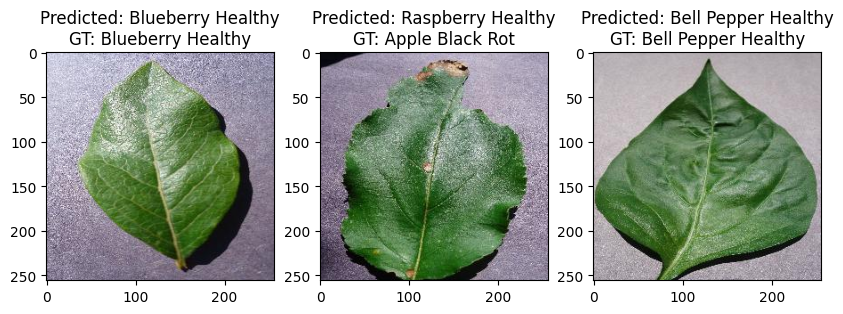

In [28]:
DEVICE = torch.device("cuda")

DCNN = torch.load("DiseasedCNN.pth", map_location=torch.device("cuda"), weights_only=False)
# model = DiseasedCNN()
# model.load_state_dict(torch.load("DiseasedCNN_statedict.pth", map_location=torch.device("cpu")))


DCNN = DCNN.to(DEVICE)
DCNN.eval()

LABELS = ["Apple Scab", "Apple Black Rot", "Apple Cedar Rust", "Apple Healthy", "Blueberry Healthy", "Cherry Healthy", "Cherry Powdery Mildew", "Corn Cercospora Leaf Spot", "Corn Common Rust", "Corn Healthy", "Corn Northern Leaf Blight", "Grape Black Rot", "Grape Black Measles", "Grape Healthy", "Grape Isariopsis Leaf Spot", "Orange Haunglonbing",
          "Peach Bacterial Spot", "Peach Healthy", "Bell Pepper Bacterial Spot", "Bell Pepper Healthy", "Potato Early Blight", "Potato Healthy", "Potato Late Blight", "Raspberry Healthy", "Soybean Healthy", "Squash Powdery Mildew", "Strawberry Healthy", "Strawberry Leaf Scorch", "Tomato Bacterial Spot", "Tomato Early Blight", "Tomato Healthy",
          "Tomato Late Blight", "Tomato Leaf Mold", "Tomato Septoria Leaf Spot", "Tomato Spider Mites", "Tomato Target Spot", "Tomato Mosaic Virus", "Tomato Yellow Leaf Curl Virus"]

data = ImageFolder(root="PlantVillage/Testing", transform=transforms.ToTensor())

# Define data loader
dataloader = DataLoader(data, batch_size=32, shuffle=True, num_workers=0)
data_iter = iter(dataloader) 
images, labels = next(data_iter)  # Ignore labels, we only need images

pictures = images.to(DEVICE)
names = labels.to(DEVICE)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))


start_time = time.time()
y_pred = DCNN(pictures).argmax(dim=1)
end_time = time.time()

inference_time = (end_time - start_time)

print("Inference time = %f secs" % inference_time)

for i in range(3):
    image = images[i].permute(1, 2, 0)
    axes[i].imshow(image)
    axes[i].set_title("Predicted: " + LABELS[y_pred[i]] + "\nGT: " + LABELS[names[i]])

# plt.imshow(augmented_images[0])
plt.show()

Inference time = 0.000000 secs


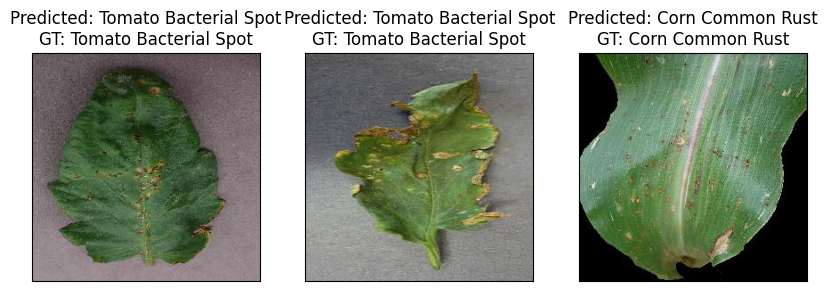

In [47]:
from StudentModel import StudentModel

student = torch.load("StudentModel.pth", map_location=torch.device("cuda"), weights_only=False)

student.to(DEVICE)
student.eval()

LABELS = ["Apple Scab", "Apple Black Rot", "Apple Cedar Rust", "Apple Healthy", "Blueberry Healthy", "Cherry Healthy", "Cherry Powdery Mildew", "Corn Cercospora Leaf Spot", "Corn Common Rust", "Corn Healthy", "Corn Northern Leaf Blight", "Grape Black Rot", "Grape Black Measles", "Grape Healthy", "Grape Isariopsis Leaf Spot", "Orange Haunglonbing",
          "Peach Bacterial Spot", "Peach Healthy", "Bell Pepper Bacterial Spot", "Bell Pepper Healthy", "Potato Early Blight", "Potato Healthy", "Potato Late Blight", "Raspberry Healthy", "Soybean Healthy", "Squash Powdery Mildew", "Strawberry Healthy", "Strawberry Leaf Scorch", "Tomato Bacterial Spot", "Tomato Early Blight", "Tomato Healthy",
          "Tomato Late Blight", "Tomato Leaf Mold", "Tomato Septoria Leaf Spot", "Tomato Spider Mites", "Tomato Target Spot", "Tomato Mosaic Virus", "Tomato Yellow Leaf Curl Virus"]

data = ImageFolder(root="PlantVillage/Testing", transform=transforms.ToTensor())

# Define data loader
dataloader = DataLoader(data, batch_size=32, shuffle=True, num_workers=0)
data_iter = iter(dataloader) 
images, labels = next(data_iter)  # Ignore labels, we only need images

pictures = images.to(DEVICE)
names = labels.to(DEVICE)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))



start_time = time.time()
y_pred = student(pictures).argmax(dim=1)
end_time = time.time()

inference_time = (end_time - start_time)

print("Inference time = %f secs" % inference_time)

for i in range(3):
    image = images[i].permute(1, 2, 0)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].imshow(image)
    axes[i].set_title("Predicted: " + LABELS[y_pred[i]] + "\nGT: " + LABELS[names[i]])

# plt.imshow(augmented_images[0])
# plt.savefig("StudentPredictions.png")
plt.show()

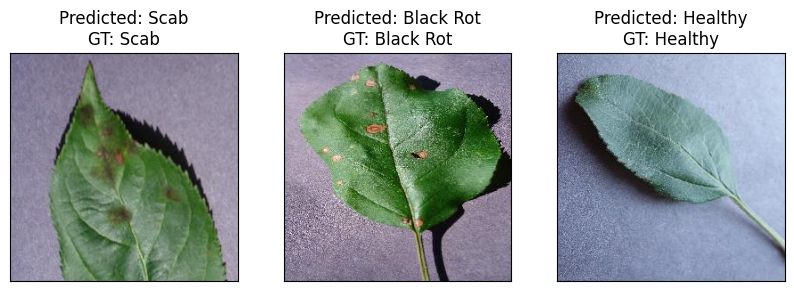

In [ ]:
from DeepCNN import DeepCNN

LABELS = ["Black Rot", "Cedar Rust", "Healthy", "Scab"]

model = DeepCNN()
model.load_state_dict(torch.load("../reproduction/original_model_96.pth"))

model.eval()
model.to(DEVICE)

data = ImageFolder(root="../reproduction/Original_Dataset\Testing", transform=transforms.Compose([transforms.ToTensor()]))

# Define data loader
dataloader = DataLoader(data, batch_size=32, shuffle=True, num_workers=4)
data_iter = iter(dataloader) 
images, labels = next(data_iter)  # Ignore labels, we only need images

pictures = images.to(DEVICE)
names = labels.to(DEVICE)

fig, axes = plt.subplots(1, 3, figsize=(10, 10))
y_pred = model(pictures).argmax(dim=1)

for i in range(3):
    image = images[i].permute(1, 2, 0)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].imshow(image)
    axes[i].set_title("Predicted: " + LABELS[y_pred[i]] + "\nGT: " + LABELS[names[i]])

# plt.imshow(augmented_images[0])
# plt.savefig("../reproduction/DeepCNNPredictions.png")
plt.show()